# <center>Quantum Computing and Quantum Machine Learning - Project 1<center>

# <center> Codes <center>

In this report we include some created programs in explicit way and results for each question.

# Part a)
Define also Bell states and write a code where you implement a Hadamard gate and thereafter a CNOT gate on one of the Bell states of your choice. Perform thereafter a measurement on the first qubit and thereafter on the second qubit.

In [1]:
from colorama import Fore, Back, Style
import numpy as np

# Hardamard gate
H = np.sqrt(0.5)*np.array([[1,1],
                           [1,-1]])

# Computational basis
statezero = np.array([[1],[0]])
stateone = np.array([[0],[1]]) 

# CNOT gate
CNOT = np.array([[1,0,0,0],
                 [0,1,0,0],
                 [0,0,0,1],
                 [0,0,1,0]])

# Probabilities
P0 = (np.sqrt(0.5)*(np.kron(statezero, statezero).T + np.kron(stateone, stateone).T)@(np.kron(statezero, statezero)))**2  # Probability to get state zero
P1 = (np.sqrt(0.5)*(np.kron(statezero, statezero).T + np.kron(stateone, stateone).T)@(np.kron(stateone, stateone)))**2    # Probability to get state one
                                                                              # np.kron() means tensor product between matrices
n = 10000
x = np.random.uniform(0,1,n)  # generate ramdom number in this interval
def num(x):
	if x <= P0:
		return True
	else:
		return False
        
inside_count = 0
for i in range(n):
	if num(x[i]):
		inside_count += 1  # count the cases for qubit 0

h = n - inside_count       # count the cases for qubit 1

print(f"{Fore.RED}---------------------------------------------------------------{Fore.BLACK}")
print(f"{Fore.RED}---------------------------------------------------------------{Fore.BLACK}")
print("Counter:")
print("Qubit Zero (0) =",inside_count,",", "Qubit One (1) =", h)
print(f"{Fore.RED}---------------------------------------------------------------{Fore.BLACK}")
print(f"{Fore.RED}---------------------------------------------------------------{Fore.BLACK}")
print('Probability to get state zero =',P0)
print("---------------------------------------------------------------")
print("---------------------------------------------------------------")
print('Probability to get state one =',P1)
print("---------------------------------------------------------------")
print("---------------------------------------------------------------")

---------------------------------------------------------------
---------------------------------------------------------------
Counter:
Qubit Zero (0) = 5036 , Qubit One (1) = 4964
---------------------------------------------------------------
---------------------------------------------------------------
Probability to get state zero = [[0.5]]
---------------------------------------------------------------
---------------------------------------------------------------
Probability to get state one = [[0.5]]
---------------------------------------------------------------
---------------------------------------------------------------


# Part c)
Implement now the variational quantum eigensolver (VQE) for the above Hamiltonian and set up the circuit(s) which is(are) needed in order to find the eigenvalues of this system. Discuss the results and compare these with those from part b). Feel free to use either **Qiskit** or your own code (based on the setup from part a)) or both approaches. Discuss your results.

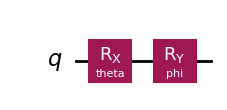

In [2]:
from qiskit import QuantumCircuit
from qiskit.circuit import Parameter
import numpy as np

params = [Parameter("theta"), Parameter("phi")]  # Parameters 

def circuit(params):
    qr = QuantumCircuit(1)
    qr.rx(params[0],0)      # Rx gate
    qr.ry(params[1],0)      # Ry gate
    return qr
    
qc = circuit(params)
qc.draw(output="mpl")

In [3]:
from  matplotlib import pyplot as plt
import numpy as np
from qiskit.circuit import Parameter
from math import sqrt
import warnings
warnings.simplefilter(action = "ignore", category = RuntimeWarning)

# Pauli matrix and identity matrix
I = np.array([[1,0],
              [0,1]])
X = np.array([[0,1],
              [1,0]])
Y = np.array([[0,-1j],
              [1j,0]])
Z = np.array([[1,0],
              [0,-1]])

# Computational basis
statezero = np.array([1,0])

# Hamiltonian rewrite in Pauli matrices terms
H = 2*I + Z + 0.2*X

params = [Parameter("theta"), Parameter("phi")]

# product of the rotationals Ry(phi)@Rx(theta)
def RyRx(params):
    return (np.cos(params[1]*0.5)*I - 1j*np.sin(params[1]*0.5)*Y)@(np.cos(params[0]*0.5)*I - 1j*np.sin(params[0]*0.5)*X)

# Energy (expectation value)
def Energy(params):
    psi = RyRx(params) @ statezero
    energy = psi.conj().T @ H @ psi
    return energy

Now we optimize the parameters and minimize the energy. \
Powell method minimize a function using bidirectional search. It's a combination between the Gauss–Newton algorithm and gradient descent, but using an explicit trust region. \
Optimization is an iterative method, it ensures precision and stability to reach the ground state energy.

In [4]:
import scipy.optimize as optimize

initial = np.random.rand(2)      # number of parameters for optimize
result = optimize.minimize(Energy, initial, method='Powell',tol=1e-12)   # minimization of the energy        

print("Value of theta = ",result.x[0])  # optimal value for thetha
print("------------------------------------")
print("------------------------------------")
print("Value of phi = ",result.x[1])    # optimal value for phi
print("------------------------------------")
print("------------------------------------")
print("Energy =",result.fun)

Value of theta =  (3.1415926540653554+2.730739999451436e-10j)
------------------------------------
------------------------------------
Value of phi =  (0.19739555991870283+1.841792228821129e-21j)
------------------------------------
------------------------------------
Energy = (0.9801960972814429-2.2858221656743107e-27j)


# Part e)
Compute now the eigenvalues of this system using the VQE method and set up the circuits needed to find the lowest state. Compare these
results with those from the previous part. Feel free again to either use your own code for the circuit and your VQE code or use the
functionality of [Qiskit](https://qiskit.org/), or both.

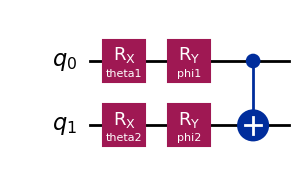

In [5]:
from qiskit import QuantumCircuit
from qiskit.circuit import Parameter
import numpy as np

params = [Parameter("theta1"), Parameter("phi1"), Parameter("theta2"), Parameter("phi2")]
def circuit(params):
    qr = QuantumCircuit(2)
    qr.rx(params[0],0)        # rotational x for the first qubit
    qr.ry(params[1],0)        # rotational y for the first qubit
    qr.rx(params[2],1)        # rotational x for the second qubit
    qr.ry(params[3],1)        # rotational y for the second qubit
    qr.cx(0, 1)               # CNOT gate
    return qr
qc = circuit(params)
qc.draw(output="mpl")

Now we rewrite the hamiltonian in terms of Pauli matrices. 

In [6]:
from qiskit.circuit import Parameter
import numpy as np
import warnings
warnings.simplefilter(action = "ignore", category = RuntimeWarning)

# Pauli matrix and identity matrix
I = np.array([[1,0],
              [0,1]])
X = np.array([[0,1],
              [1,0]])
Y = np.array([[0,-1j],
              [1j,0]])
Z = np.array([[1,0],
              [0,-1]])
# CNOT gate
CNOT = np.array([[1,0,0,0],
                 [0,1,0,0],
                 [0,0,0,1],
                 [0,0,1,0]])
# Hamiltonian non-interacting
E00 = 0.0
E10 = 2.5
E01 = 6.5
E11 = 7.0
alpha = (E00 + E10 + E01 + E11)/4
betha = (E00 + E10 - E01 - E11)/4
gamma = (E00 - E10 + E01 - E11)/4
delta = (E00 - E10 - E01 + E11)/4

H0 = np.array([[E00,0,0,0],
               [0,E10,0,0],
               [0,0,E01,0],
               [0,0,0,E11]])

# Hamiltonian interacting
Hx = 2.0
Hz = 3.0
H1 = Hx*np.kron(X,X) + Hz*np.kron(Z,Z) # Matrix 4x4

# Total hamiltonian
H = alpha*np.kron(I,I) + betha*np.kron(I,Z) + gamma*np.kron(Z,I) + (delta + Hz)*np.kron(Z,Z) + Hx*np.kron(X,X) # Matrix 4x4

# Computational base
statezero = np.array([1,0])


params = [Parameter("theta1"), Parameter("phi1"), Parameter("theta2"), Parameter("phi2")]
# product of the rotationals Ry(phi)@Rx(theta)
def Ry1Rx1(params):                           # podruct of rotational for the firts qubit
    return (np.cos(params[1]*0.5)*I-1j*np.sin(params[1]*0.5)*Y)@(np.cos(params[0]*0.5)*I-1j*np.sin(params[0]*0.5)*X)

def Ry2Rx2(params):                           # podruct of rotational for the second qubit
    return (np.cos(params[3]*0.5)*I-1j*np.sin(params[3]*0.5)*Y)@(np.cos(params[2]*0.5)*I-1j*np.sin(params[2]*0.5)*X)

# Energy (expectation value)
def Energy(params):
    psi = CNOT @ np.kron(Ry1Rx1(params) @ statezero, Ry2Rx2(params) @ statezero)
    energy = psi.conj().T @ H @ psi
    return energy

Let's apply again the optimize and minimize

In [7]:
import scipy.optimize as optimize

initial = np.random.rand(4)    # number of parameters
result = optimize.minimize(Energy, initial, method='Powell',tol=1e-12)

print("Value of theta1 = ",result.x[0])          # optimal value for thetha1
print("------------------------------------")
print("------------------------------------")
print("Value of phi1 = ",result.x[1])            # optimal value for phi1
print("------------------------------------")
print("------------------------------------")
print("Value of theta2 = ",result.x[2])          # optimal value for thetha2
print("------------------------------------")
print("------------------------------------")
print("Value of phi2 = ",result.x[3])            # optimal value for phi2
print("------------------------------------")
print("------------------------------------")
print("Energy =",result.fun)

Value of theta1 =  (3.141592647936002-3.5107994010204767e-09j)
------------------------------------
------------------------------------
Value of phi1 =  (0.7853981646384572+1.2883721236722916e-09j)
------------------------------------
------------------------------------
Value of theta2 =  (3.1415926535650205+1.2835626554913538e-11j)
------------------------------------
------------------------------------
Value of phi2 =  (1.015327637814761e-11+3.1978440584760626e-11j)
------------------------------------
------------------------------------
Energy = (-1.3284271247461903-5.921653995853435e-25j)


# Part g)
Use now the VQE method to find the same eigenvalues as in part f) and set up the circuits and simulations which are needed. Compare your
results with those from part f) and comment your results.

## **Code for $J = 1$ and $N = 2$**

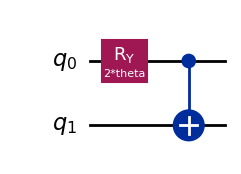

In [8]:
from qiskit import QuantumCircuit
from qiskit.circuit import Parameter
import numpy as np

params = [Parameter("theta")]
def circuit(params):
    qr = QuantumCircuit(2)
    qr.ry(2*params[0],0)
    qr.cx(0, 1)
    return qr
qc = circuit(params)
qc.draw(output="mpl")

In [9]:
from  matplotlib import pyplot as plt
import numpy as np
from qiskit.circuit import Parameter
import warnings
warnings.simplefilter(action = "ignore", category = RuntimeWarning)

# Pauli matrix and identity matrix
I = np.array([[1,0],
              [0,1]])
X = np.array([[0,1],
              [1,0]])
Y = np.array([[0,-1j],
              [1j,0]])
Z = np.array([[1,0],
              [0,-1]])
# CNOT gate
CNOT = np.array([[1,0,0,0],
                 [0,1,0,0],
                 [0,0,0,1],
                 [0,0,1,0]])

# Computational base
statezero = np.array([1,0])

# Hamiltonian written in Pauli matrices terms
E = 0.5
V = 1.0
H =  E*0.5*(np.kron(Z, I) + np.kron(I, Z)) - V*0.5*(np.kron(X, X) - np.kron(Y,Y))

params = [Parameter("theta")]

# product of the rotationals Ry(phi)@Rx(theta)
def Ry(params):
    return np.cos(2*params[0] - np.pi)*I - 1j*np.sin(2*params[0] - np.pi)*Y

# Energy 
def Energy(params):
    psi = CNOT @ np.kron(Ry(params) @ statezero, statezero)
    energy = psi.conj().T @ H @ psi
    return energy

In [10]:
import scipy.optimize as optimize

initial = np.random.rand(1)
result = optimize.minimize(Energy, initial)

print("Value of theta = ",result.x[0])
print("------------------------------------")
print("------------------------------------")
#print("Value of phi = ",result.x[1])
print("------------------------------------")
print("------------------------------------")
print("Energy =",result.fun)

Value of theta =  (0.5086109767327969+0j)
------------------------------------
------------------------------------
------------------------------------
------------------------------------
Energy = (-1.1180339887498942+0j)


In [ ]:
from qiskit import QuantumCircuit
from qiskit.circuit import Parameter
import numpy as np

params = [Parameter("theta1"), Parameter("phi1"), Parameter("theta2"), Parameter("phi2"), Parameter("theta3"), Parameter("phi3"), Parameter("theta4"), Parameter("phi4")]
def circuit(params):
    qr = QuantumCircuit(4)
    qr.rx(params[0],0)        # rotational x for the first qubit
    qr.ry(params[1],0)        # rotational y for the first qubit
    qr.rx(params[2],1)        # rotational x for the second qubit
    qr.ry(params[3],1)        # rotational y for the second qubit
    qr.cx(0, 1)               # CNOT gate
    qr.rx(params[4],2)        # rotational x for the first qubit
    qr.ry(params[5],2)        # rotational y for the first qubit
    qr.cx(1, 2)               # CNOT gate
    qr.rx(params[6],3)        # rotational x for the first qubit
    qr.ry(params[7],3)        # rotational y for the first qubit
    qr.cx(2, 3)               # CNOT gate
    return qr
qc = circuit(params)
qc.draw(output="mpl")